# Projeção de dados alguns dados não sei ainda

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat
import statsmodels.api as sm
from multidata import *

In [2]:
%run ../Limpezas/limpeza_análise_energética.ipynb

## Vector Auto Regression (VAR)

In [3]:
df = MultiData(dict_analise_energetica)

In [4]:
print(df)

Produção_de_Energia_Primária | Produção_de_Energia_Primária_% | Oferta_Interna_de_Energia | Oferta_Interna_de_Energia_% | Consumo_Final_por_Fonte | Consumo_Final_por_Fonte_% | Consumo_Final_por_Setor | Consumo_Final_por_Setor_% | Consumo_Final_Energético_por_Fonte | Consumo_Final_não_Energético_por_Fonte | Dependência_Externa_de_Energia | Composição_Setorial_do_Consumo_de_Derivados_de_Petróleo | Composição_Setorial_do_Consumo_de_Eletricidade | Composição_Setorial_do_Consumo_de_Carvão_Vapor | Composição_Setorial_do_Consumo_Final_de_Biomassa


In [5]:
training_a = df[0]['RENOVÁVEL'][:40]
training_b = df['Consumo_Final_por_Setor']['RESIDENCIAL'][:40]
testing_a = df[0]['RENOVÁVEL'][40:]
testing_b = df['Consumo_Final_por_Setor']['RESIDENCIAL'][40:]
training = pd.concat([training_a, training_b],axis=1)

In [6]:
model = sm.tsa.VAR(np.asarray(training, dtype='float'))
model_fit = model.fit()

In [7]:
prediction = pd.DataFrame(model_fit.forecast(model.endog, steps=14))
last_year = training.index[-1]
prediction.index = [last_year + pd.offsets.DateOffset(years=i) for i in range(len(prediction))]

In [8]:
prediction.rename(columns={0:'RENOVÁVEL', 1:'RESIDENCIAL'}, inplace=True)

In [9]:
prediction

,RENOVÁVEL,RESIDENCIAL
2009-01-01,115761.889351,23881.755984
2010-01-01,120462.386110,24429.126047
2011-01-01,125499.304552,25024.350486
2012-01-01,130899.512276,25670.816646
2013-01-01,136691.882963,26372.184281
2014-01-01,142907.452430,27132.405808
2015-01-01,149579.586515,27955.748144
2016-01-01,156744.161718,28846.816235
2017-01-01,164439.759570,29810.578425
2018-01-01,172707.875791,30852.393778


In [10]:
training

,RENOVÁVEL,RESIDENCIAL
ANO,,
1970-01-01,39038.398172,22075.950844
1971-01-01,39539.969319,22254.278666
1972-01-01,41038.508698,22441.210068
1973-01-01,41775.925025,22354.50455
1974-01-01,43157.573802,22317.118047
1975-01-01,43859.74627,22049.221532
1976-01-01,44110.071223,21937.336531
1977-01-01,45817.534001,21413.933606
1978-01-01,46457.944616,20821.059775


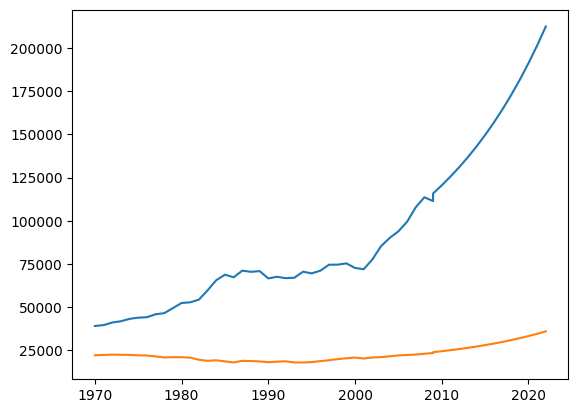

In [13]:
forecast = pd.concat([training, prediction])
plt.plot(forecast)
plt.show()

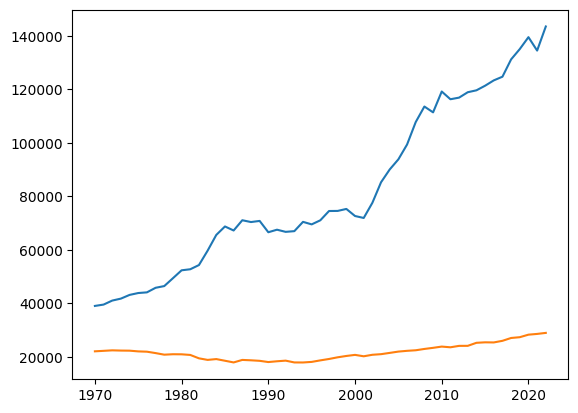

In [12]:
plt.plot(df[0]['RENOVÁVEL'])
plt.plot(df['Consumo_Final_por_Setor']['RESIDENCIAL'])
plt.show()